In [1]:
from ParticleSwarmOptimization import WithNeighborsPSO

In [2]:
from jmetal.problem.singleobjective.unconstrained import Rastrigin
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.archive import CrowdingDistanceArchive

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
phi_ns = [0, 0.1, 0.3, 0.5, 0.8, 1.0]
repetitions = 10
max_evaluations = 10000
swarm_size = 100
dimensions = 100
problem = Rastrigin(dimensions)

In [5]:
data = []
for phi_n in phi_ns:
    for i in range(repetitions):
        algorithm = WithNeighborsPSO(
            problem=Rastrigin(50),
            swarm_size=swarm_size,
            leaders=CrowdingDistanceArchive(100),
            termination_criterion=StoppingByEvaluations(max_evaluations),
            phi_n=phi_n
        )
        algorithm.run()
        solutions = algorithm.get_result()
        objective = solutions[0].objectives[0]
        run_data = {
            'phi_n': phi_n,
            'result': objective
        }
        data.append(run_data)


In [6]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())

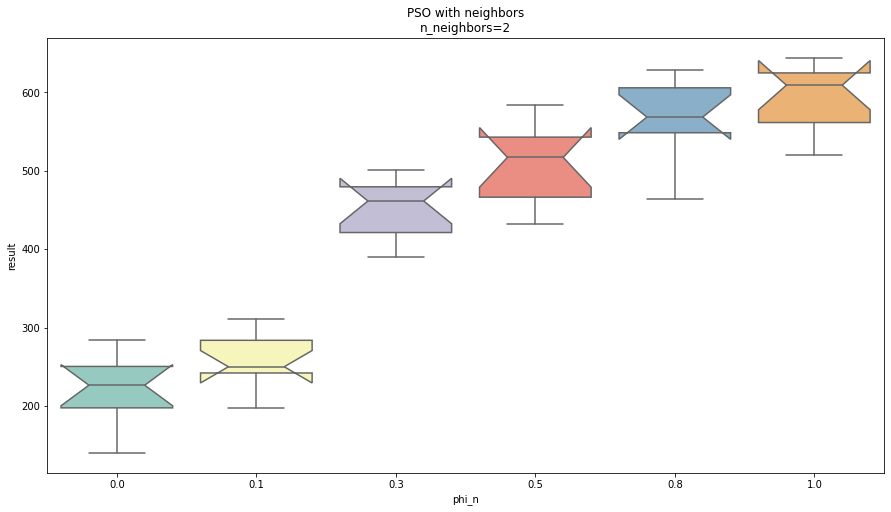

In [7]:
plt.figure(figsize=(15,8))
plt.title('PSO with neighbors\nn_neighbors=2')
sns.set_style('whitegrid')
ax = sns.boxplot(x='phi_n', y='result', data=df, palette='Set3', notch=True)